## Problem Statement

Predict whether a person is eligible to get a loan or not based on some variables 

In [1]:
import pandas as pd # for dataframes reading, manipulation
import numpy as np # for calculations
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns

In [15]:
train_set=pd.read_csv("train_ctrUa4K.csv")
test_set=pd.read_csv("test_lAUu6dG.csv")

In [4]:
train_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### It is clear that the last column from the train dataset is the target column. 

#### Make sure to copy the files into diffrentr files. So in case we make any changes to the data, we will still have a copy of the original dataset.

In [3]:
train_ori=train_set.copy()
test_ori=test_set.copy()

#### Check the columns of the dataset

In [7]:
train_set.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Check the data types of each column

In [10]:
train_set.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
test_set.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

#### Looking at the "Dependents" column of the dataset, we think that it should be in integer/float format. So instead of directly converting it we check the type of entries and their frequencies in that column

In [12]:
train_set["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

#### one of the entries is 3+ which implies that there are 3 or more dependents of that person. So for now we leave the column as it is. If we need to do any chenges we can do them later.  
##### if all the values in the column were integers we would have changed the data type of the column to integer. But soince we do not know the exact number of people who above 3 we dont do it for now

#### check the dimemsions of the dataset

In [13]:
train_set.shape

(614, 13)

In [14]:
test_set.shape

(367, 12)

In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [17]:
train_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
test_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [42]:
train_set_na=pd.DataFrame(train_set.isna().sum(axis=0)).transpose()


In [43]:
test_set_na=pd.DataFrame(test_set.isna().sum(axis=0)).transpose()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [61]:
train_set["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [64]:
train_set["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [65]:
train_set["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [67]:
train_set["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [68]:
train_set["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [69]:
train_set["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [8]:
train_set["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Univariate Visualisation 

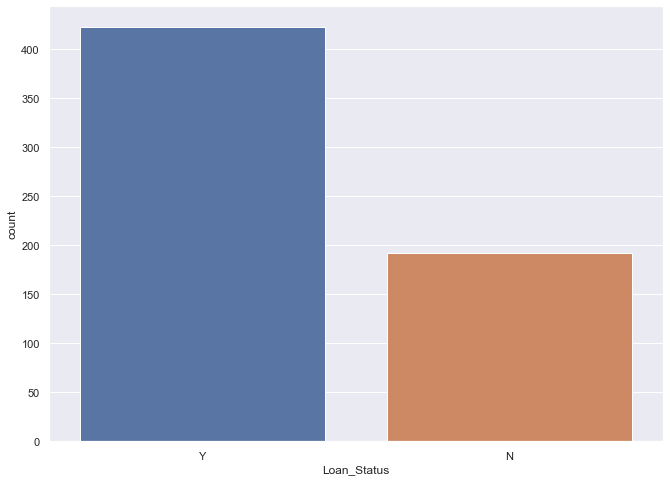

In [41]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x="Loan_Status",data=train_set)

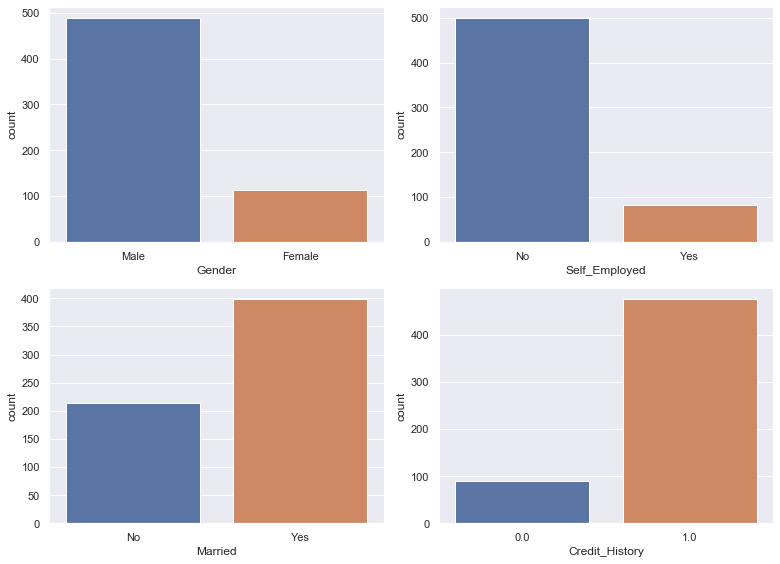

In [48]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})
plt.subplot(221)
sns.countplot(x="Gender",data=train_set)
plt.subplot(222)
sns.countplot(x="Self_Employed",data=train_set)
plt.subplot(223)
sns.countplot(x="Married",data=train_set)
plt.subplot(224)
sns.countplot(x="Credit_History",data=train_set)

plt.tight_layout()

### Some inference from the above visualizations
1) large number of *males* as complared to *female* applicants  
2) Most of the applicants are **NOT** self-employed  
3) 2/3rd of the people are married  
4) Majority of the people have repaid their debts  

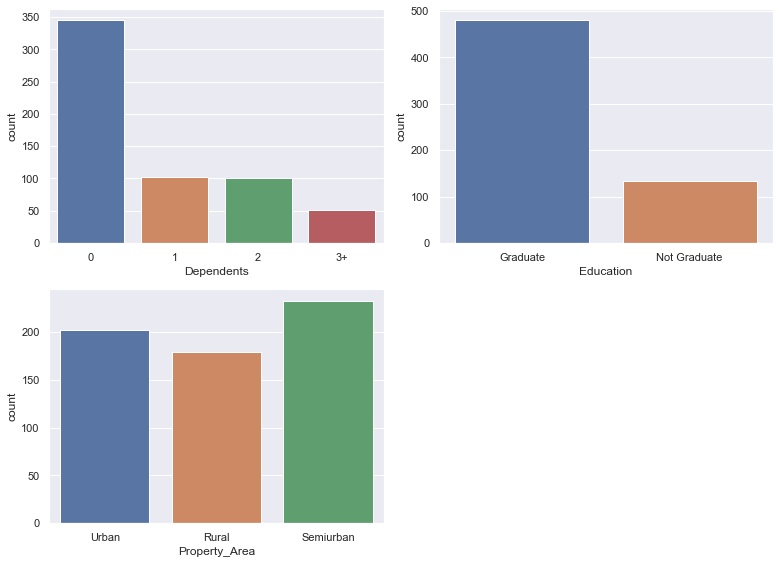

In [49]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})

plt.subplot(221)
sns.countplot(x="Dependents",data=train_set)
plt.subplot(222)
sns.countplot(x="Education",data=train_set)
plt.subplot(223)
sns.countplot(x="Property_Area",data=train_set)

plt.tight_layout()

### Inference from the above data
1) More than 50% of the peole dont have any dependent  
2) More than 2/3rd of the applicants are Graduates  
3) Property_Area is pretty uniformly distributed, but Semiurban people have the upperhand

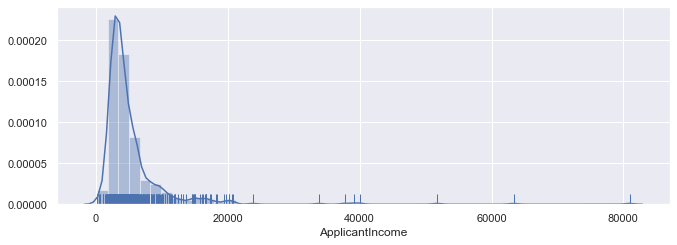

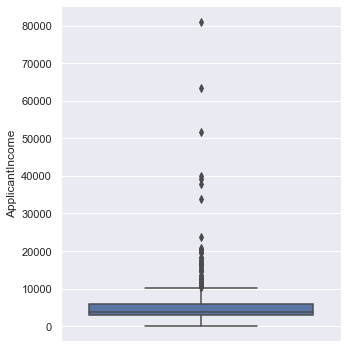

In [69]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})

plt.subplot(211)
sns.distplot(train_set["ApplicantIncome"],rug=True)

sns.catplot(y="ApplicantIncome",data=train_set,kind="box")

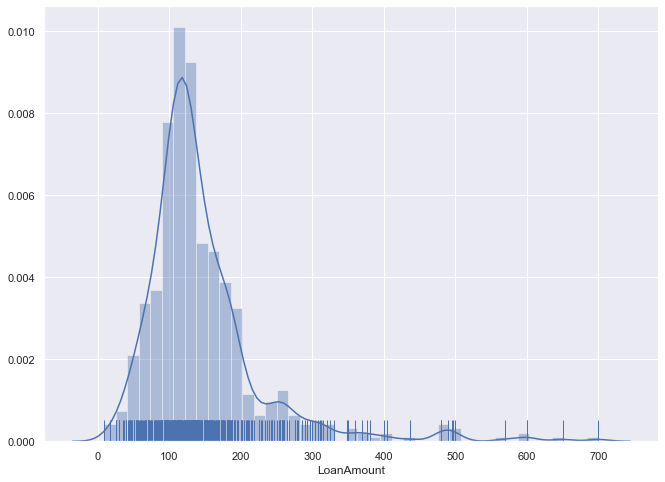

In [51]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})

sns.distplot(train_set["LoanAmount"],rug=True)

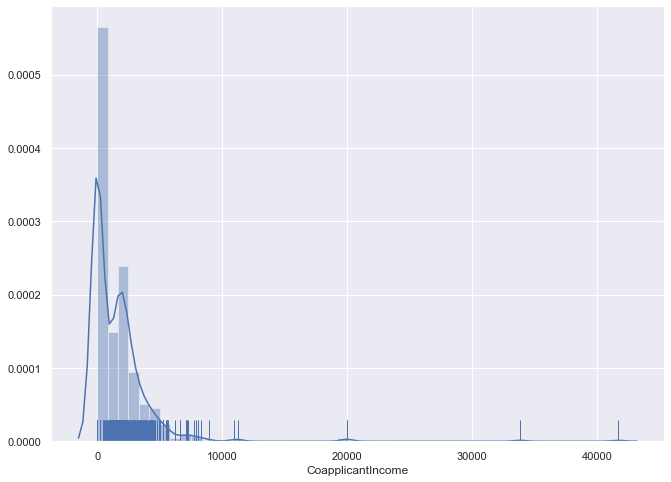

In [52]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})

sns.distplot(train_set["CoapplicantIncome"],rug=True)

### Inference from the above
1) Majority of the applicant income is below 20000  
2) Normally distributed LoanAmount with mean around 150  
3) Coapplicant income is less as compared to applicant and majority is below 10000

### Bivariate Visualisations

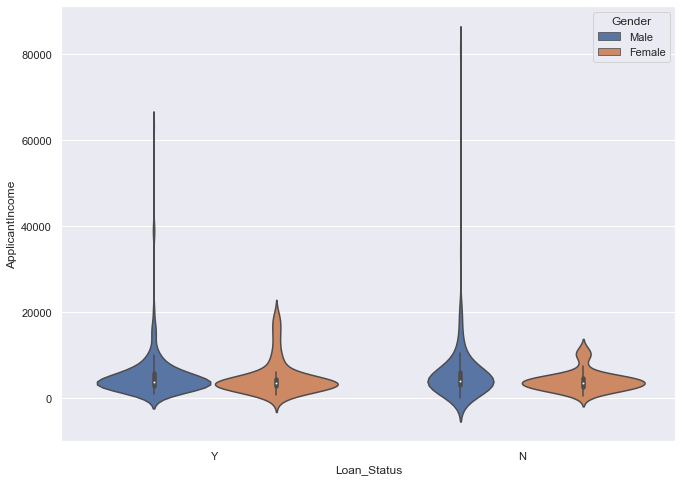

In [53]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})

sns.violinplot(x=train_set["Loan_Status"],y=train_set["ApplicantIncome"],hue=train_set["Gender"])

#### Most of the female applicants have salaries less than 20000. While the Male salaries range from 0 to 80000. It ca also be seen that there are many outliers in the data.

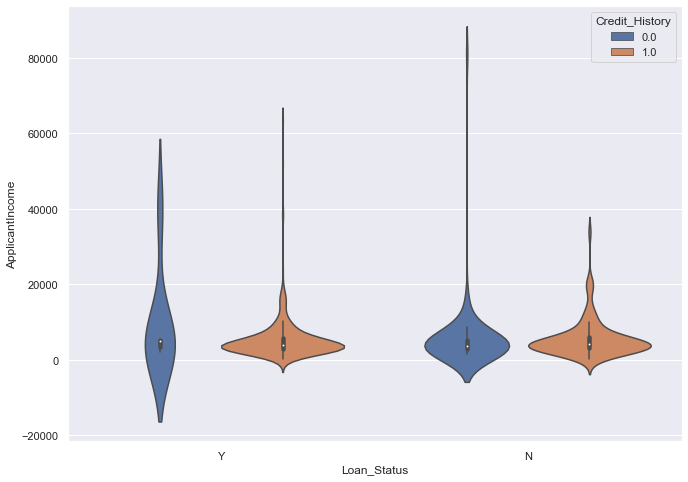

In [54]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})

sns.violinplot(x=train_set["Loan_Status"],y=train_set["ApplicantIncome"],hue=train_set["Credit_History"])

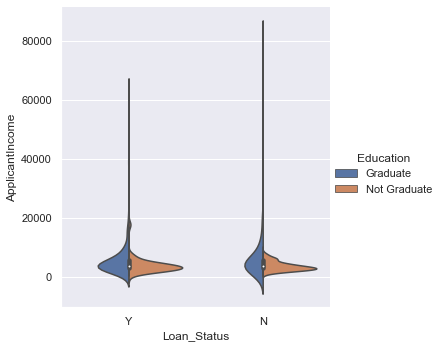

In [55]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})

sns.catplot(x="Loan_Status",
               y="ApplicantIncome",
               hue="Education",
               data=train_set,
                kind="violin",split=True)

#### Clearly being a graduate causes some changes in the data. Not graduate applicants tend to have lesser income thus they have lesser cahances to repay the loan

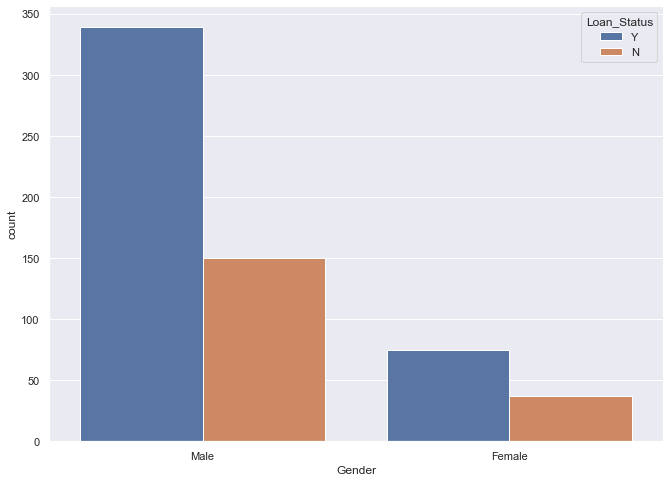

In [61]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})
sns.countplot(x="Gender",hue="Loan_Status",data=train_set)

#### Clearly the male applicants are much greater in number as compared to the female applicants. But the proportion seems to be the same,ie, almost 30% of both the applicants did not get the loan

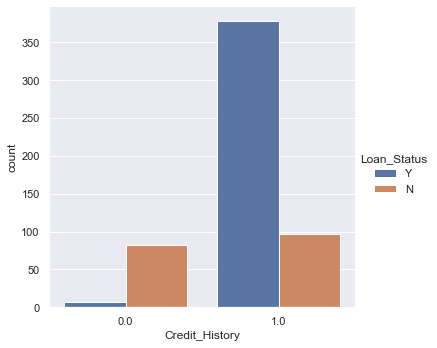

In [78]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,7)})
sns.catplot(x="Credit_History",kind="count",hue="Loan_Status",data=train_set)

#### Seems like the people with credit history =1 are more likely to get their loans approved

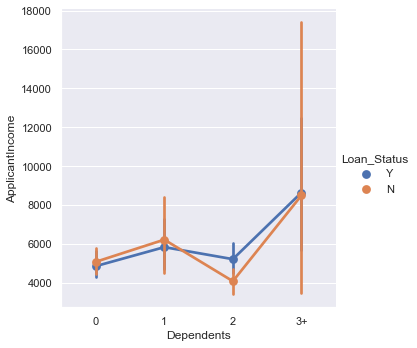

In [57]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(11,8)})

sns.catplot(x="Dependents",y="ApplicantIncome",hue="Loan_Status",data=train_set,kind="point")

#### There are too many outliers in the data but the mean says that the number of dependenrs does not mattr much in relation to the income categorised by loan status. We can see that the lines almost overlap eachother

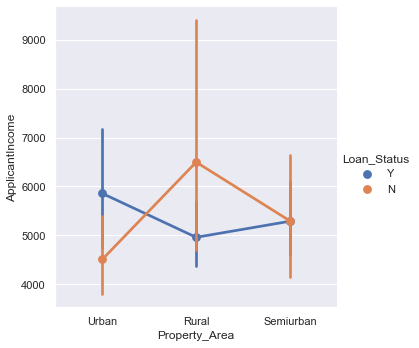

In [60]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(12,9)})

sns.catplot(x="Property_Area",y="ApplicantIncome",hue="Loan_Status",data=train_set,kind="point")

#### nothing can be inferred from the above line graph

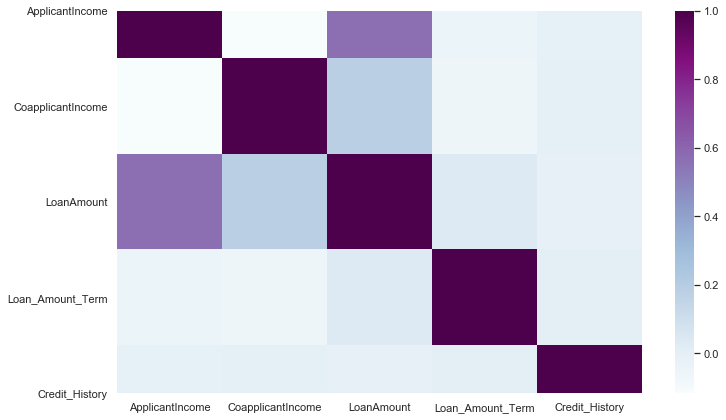

In [91]:
sns.set(rc={"figure.figsize":(11,6)})
sns.heatmap(train_set.corr(),cmap="BuPu")
plt.tight_layout()

#### We can infer that Loan amount and the CoapplicantIncome are have correlation above 0.6 which is strong(ish)

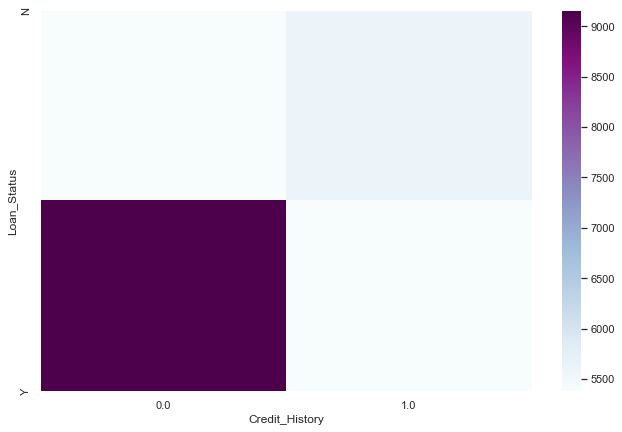

In [86]:
sns.heatmap(train_set.pivot_table(index="Loan_Status",columns="Credit_History",values="ApplicantIncome",aggfunc="mean"),cmap="BuPu")
plt.tight_layout()

#### This suggests that people who have their loan status as Y usually have 0 as credit history.

In [92]:
train_set['total_income']=train_set['ApplicantIncome']+train_set['CoapplicantIncome']

In [93]:
train_set['total_income_bin']=pd.cut(train_set['total_income'],bins=[0,2500,4000,6000,81000],labels=["low","average","high","very high"])

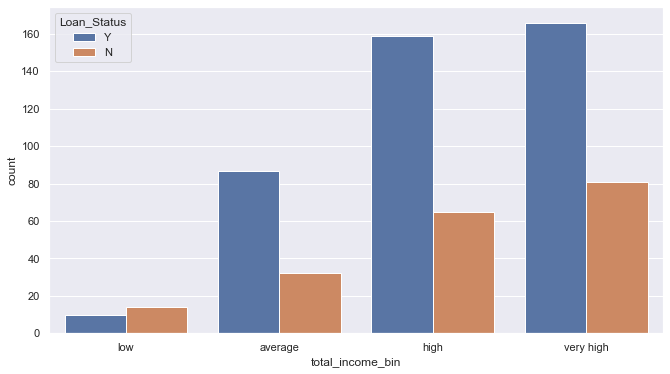

In [95]:
sns.countplot(x="total_income_bin",hue="Loan_Status",data=train_set)

#### It is clear that the number of people who get their loans approved have higher income

### Treating the outliers
1) use median or mode to fill NA values of the numerical variables  
2) use the mode to fill NA values of the Categorical values

#### First lets look at the count of NA values

In [16]:
pd.DataFrame(train_set.isna().sum(axis=0),columns=["NA_Vals"])

,NA_Vals
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


The colums with NA values are **Gender**, **Married**, **Dependents**, **Self_Employed**, **LoanAmount**, **Loan_Amount_Term**, **Credit_History**  

We have already classified the cloums as Numerical OR Categorical  

The Numerical columns from the above list are: -  

1) **LoanAmount**  

The Categorical columns are: -  

1) **Gender**  
2) **Married**  
3) **Dependents**  
4) **Self_Employed**  
5) **Loan_Amount_Term**   
6)  **Credit_History**  

#### Treating the Categorical Variables

In [17]:
train_set["Gender"].fillna(train_set["Gender"].mode()[0],inplace=True)
train_set["Married"].fillna(train_set["Married"].mode()[0],inplace=True)
train_set["Dependents"].fillna(train_set["Dependents"].mode()[0],inplace=True)
train_set["Self_Employed"].fillna(train_set["Self_Employed"].mode()[0],inplace=True)
train_set["Loan_Amount_Term"].fillna(train_set["Loan_Amount_Term"].mode()[0],inplace=True)
train_set["Credit_History"].fillna(train_set["Credit_History"].mode()[0],inplace=True)

#### Treating the Numerical Variables

In [18]:
train_set["LoanAmount"].fillna(train_set["LoanAmount"].median(),inplace=True)

### Rechecking the NA values in the train_set

In [19]:
pd.DataFrame(train_set.isna().sum(axis=0),columns=["NA_Vals"])

,NA_Vals
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


#### Doing the same for the test dataset (test_set)

In [20]:
# For Categorical Variables

test_set["Gender"].fillna(test_set["Gender"].mode()[0],inplace=True)
test_set["Married"].fillna(test_set["Married"].mode()[0],inplace=True)
test_set["Dependents"].fillna(test_set["Dependents"].mode()[0],inplace=True)
test_set["Self_Employed"].fillna(test_set["Self_Employed"].mode()[0],inplace=True)
test_set["Loan_Amount_Term"].fillna(test_set["Loan_Amount_Term"].mode()[0],inplace=True)
test_set["Credit_History"].fillna(test_set["Credit_History"].mode()[0],inplace=True)

# For Numerical Variables

test_set["LoanAmount"].fillna(test_set["LoanAmount"].median(),inplace=True)

In [21]:
# Check for NA values in the test dataset(test_set)

pd.DataFrame(test_set.isna().sum(axis=0),columns=["NA_Vals"])

,NA_Vals
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


### Treating Outliers  

One of the basic ways to treat outliers is to make *log tranformation*  
The log transofrmation does not affect the small values as much but has drastic effect on the large values.  

Other transformation can also be used depending on the data. But our main goal is to make the variable *normally distributed* after the transformation.


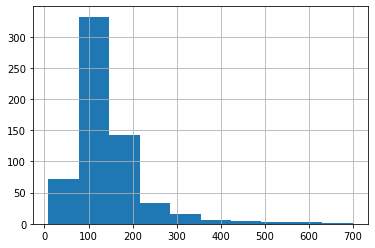

In [22]:
# Before Transformation

train_set["LoanAmount"].hist()

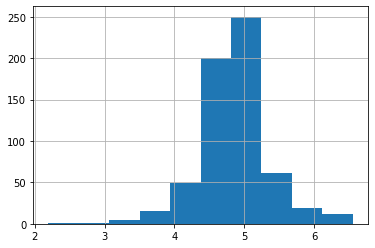

In [24]:
# After Transformation

train_set["LoanAmount_log"]=np.log(train_set["LoanAmount"])
train_set["LoanAmount_log"].hist()

In [26]:
# Transform the LoanAmount variable in the test dataset (test_set) as well

test_set["LoanAmount_log"]=np.log(test_set["LoanAmount"])